In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pymongo

In [2]:
# Import de la data a partir de mangodb
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["scrapping_stackoverflow"]
collection = db["questions"]

# On verifie que la connexion est bien établie et on affiche les 5 premières lignes
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,title,link,summary,tags,author,date
0,669931181af4c7edc23b5934,Why is there are performance penalty when usin...,https://stackoverflow.com/questions/78765285/w...,Sure there are other ways to do this but just ...,"[c#, .net, file-io]",wecky,2024-07-18 15:12:57Z
1,669931181af4c7edc23b5935,Why does the MDX Order function with ASC sort ...,https://stackoverflow.com/questions/78765283/w...,Version\nI am using Microsoft Analysis Service...,"[ssas, mdx]",doc,2024-07-18 15:12:27Z
2,669931181af4c7edc23b5936,How do I make elements show during an operatio...,https://stackoverflow.com/questions/78765282/h...,I am making a sorting algorithm visualizer usi...,"[javascript, sorting, visualization]",STM,2024-07-18 15:11:49Z
3,669931181af4c7edc23b5937,didJustFinish never turns false even if the so...,https://stackoverflow.com/questions/78765279/d...,"Hello fellow developers,\nI'm encountering a p...","[react-native, expo, expo-av]",SomeOne,2024-07-18 15:11:17Z
4,669931181af4c7edc23b5938,Azure Logic App POST request to Microsoft Grap...,https://stackoverflow.com/questions/78765275/a...,I'm experiencing an issue with an Azure Logic ...,[azure-logic-apps],khanikar,2024-07-18 15:09:52Z


In [3]:
# Suppression de la colonne id
data.drop(columns=['_id'], inplace=True)

In [4]:
# Extraction du premier mot des tags pour faciliter la visualisation
data['tag'] = data['tags'].apply(lambda x: x[0])

# On affiche les 5 premières lignes
data.head()

,title,link,summary,tags,author,date,tag
0,Why is there are performance penalty when usin...,https://stackoverflow.com/questions/78765285/w...,Sure there are other ways to do this but just ...,"[c#, .net, file-io]",wecky,2024-07-18 15:12:57Z,c#
1,Why does the MDX Order function with ASC sort ...,https://stackoverflow.com/questions/78765283/w...,Version\nI am using Microsoft Analysis Service...,"[ssas, mdx]",doc,2024-07-18 15:12:27Z,ssas
2,How do I make elements show during an operatio...,https://stackoverflow.com/questions/78765282/h...,I am making a sorting algorithm visualizer usi...,"[javascript, sorting, visualization]",STM,2024-07-18 15:11:49Z,javascript
3,didJustFinish never turns false even if the so...,https://stackoverflow.com/questions/78765279/d...,"Hello fellow developers,\nI'm encountering a p...","[react-native, expo, expo-av]",SomeOne,2024-07-18 15:11:17Z,react-native
4,Azure Logic App POST request to Microsoft Grap...,https://stackoverflow.com/questions/78765275/a...,I'm experiencing an issue with an Azure Logic ...,[azure-logic-apps],khanikar,2024-07-18 15:09:52Z,azure-logic-apps


Ici on regroupe les tags en utilisant uniquement le premier mot. Cela nous permet de regrouper les langages qui sont partagés en différents tags afin d'avoir une vision plus globale des questions posées et à quel langage ces questions font référence.

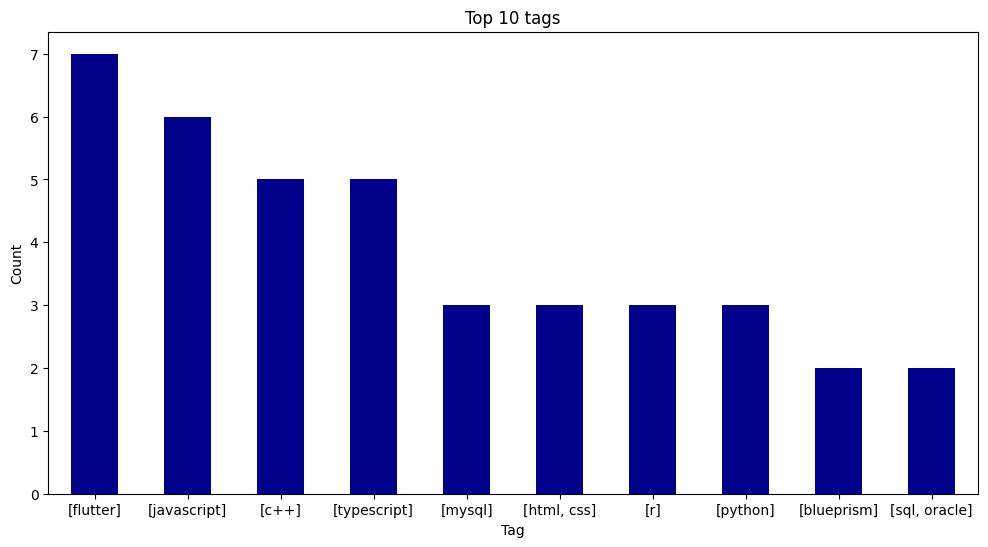

In [5]:
# Affichage en histogramme des 15 tags les plus fréquents
plt.figure(figsize=(12, 6))
data['tags'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.rc('xtick', labelsize=8)
plt.show()

On peut voir que le tag qui revient le plus est le tag **javascript**. On retrouve egalement les tags comme **flutter** et **excel, vba** en 2eme position avec un nombre identique de tags.

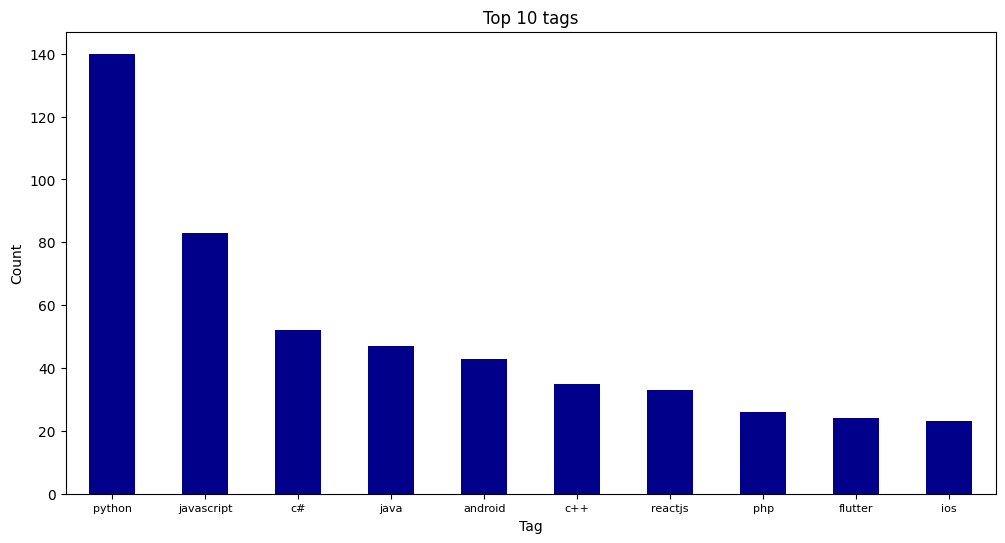

In [6]:
# Affichage en histogramme des 15 tags les plus fréquents
plt.figure(figsize=(12, 6))
data['tag'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.rc('xtick', labelsize=12)
plt.show()

Si on utilise la nouvelle colonne **tag** au lieu de la colonne tags, on visualize les tags les plus présents dans les questions et là on se rend compte que **python** est en première position et que **javascript** passe en deuxième position. **Excel / VBA** par contre n'est plus dans le top 10. 

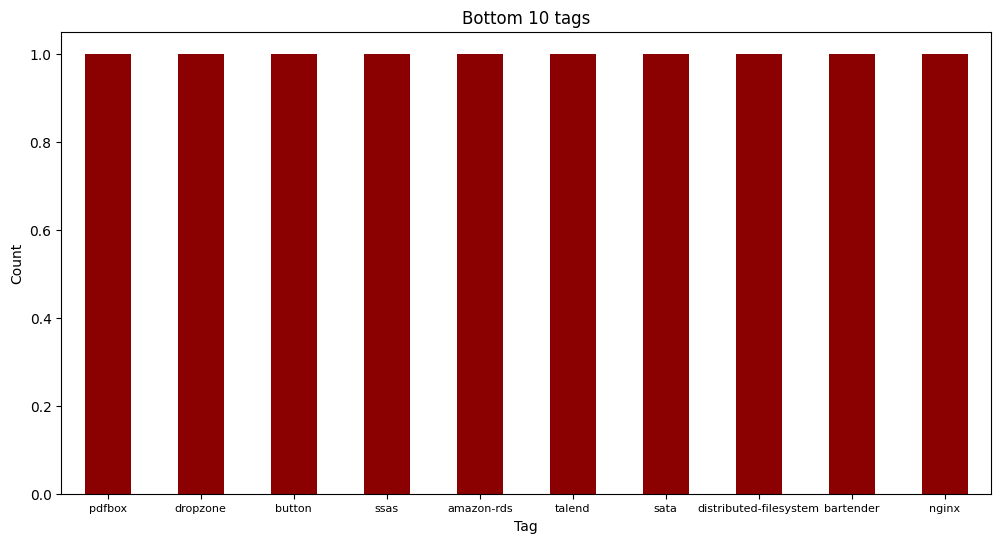

In [8]:
# Affichage en histogramme des 10 tags les moins fréquents
plt.figure(figsize=(12, 6))
data['tag'].value_counts().tail(10).plot(kind='bar', color='darkred')
plt.title('Bottom 10 tags')
plt.xlabel('Tag', fontsize=10)
plt.ylabel('Count')
plt.rc('xtick', labelsize=8)
plt.xticks(rotation=0)
plt.show()

Ici on peut voir les tags les moins utilisés pour les questions posées. On a utilisé la colonne tag afin d'avoir les résultats regroupés.